In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

data = pd.read_csv("train.csv")

In [38]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


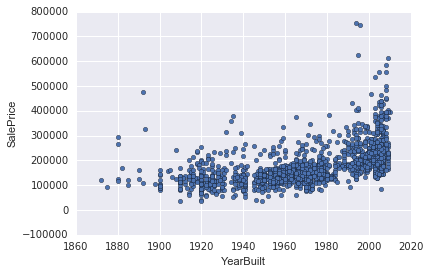

In [37]:
data.plot(x = "YearBuilt", y = "SalePrice", kind = 'scatter')

## Plot Relationship Between Single Variables and Price

In [6]:
import seaborn as sns

In [39]:
?sns.regplot

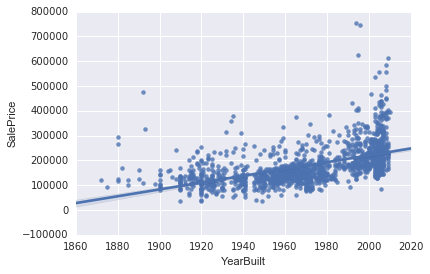

In [40]:
sns.regplot("YearBuilt","SalePrice", data)

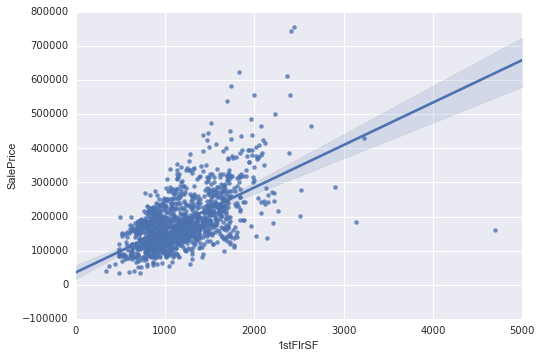

In [8]:
sns.regplot(data["1stFlrSF"], data["SalePrice"])

What other relationships can you find?

## Machine Learning

('Coefficients: \n', array([[ 113.99204906]]))
Root Mean squared error (RMSE): 66128.35


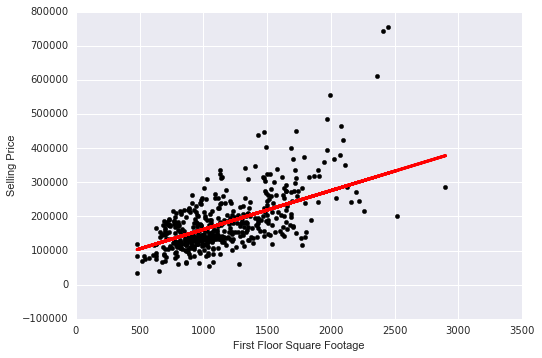

In [30]:
x = data[["1stFlrSF"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("First Floor Square Footage")
ax.set_ylabel("Selling Price")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c7fad10>]], dtype=object)

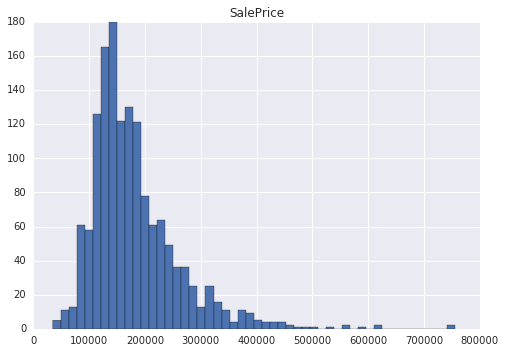

In [24]:
data.hist("SalePrice", bins = 50)